In [11]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Conv2D, \
        MaxPooling2D, GlobalMaxPooling2D, Dropout, LeakyReLU, ZeroPadding2D
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt

In [12]:
#Set if batch normalization is needed for training the CNN
batch_normalization = True
epochs = 40

def create_model(batch_norm):
    """Creates the CNN model

    Args:
        batch_norm (bool): decides whether to batch normalize the conv layers

    Returns:
        model (Sequential): CNN model
    """
    # If batch normalization, bias can be ignored
    use_bias=True
    if batch_norm:
        use_bias=False
    model = Sequential()

    # Conv layer 1: 3x3 convolution layer and 32 filters,
    model.add(ZeroPadding2D(padding=(1, 1), input_shape=(128, 43, 1),
        data_format="channels_last"))
    model.add(Conv2D(32, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv layer 1: 3x3 convolution layer and 32 filters,
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(32, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # max pooling
    model.add(MaxPooling2D(pool_size=(3, 3), data_format="channels_last"))

    # dropout
    model.add(Dropout(.25))

    # Conv Layer 3: 3x3 convolution layer and 64 filters,
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(64, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv layer 4: 3x3 convolution layer and 64 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(64, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # max pooling layer
    model.add(MaxPooling2D(pool_size=(3, 3), data_format="channels_last"))

    # dropout layer
    model.add(Dropout(.25))

    # Conv layer 5: 3x3 convolution layer and 128 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(128, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format = 'channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv layer 6: 3x3 convolution layer and 128 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(128, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # max pooling layer
    model.add(MaxPooling2D(pool_size=(3, 3), data_format="channels_last"))

    # dropout layer
    model.add(Dropout(.25))

    # Conv layer 7: 3x3 convolution layer and 256 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(256, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Conv block 8: 3x3 convolution layer and 256 filters
    model.add(ZeroPadding2D(padding=(1, 1), data_format="channels_last"))
    model.add(Conv2D(256, kernel_size=3, strides=(1, 1), padding='same', use_bias=use_bias,
        data_format='channels_last'))
    model.add(LeakyReLU(alpha=0.33))
    if batch_norm: model.add(BatchNormalization())

    # Global max-pool layer
    model.add(GlobalMaxPooling2D(data_format="channels_last"))

    # Dense layer
    model.add(Dense(1024, use_bias=use_bias))
    if batch_norm: model.add(BatchNormalization())

    # dropout layer
    model.add(Dropout(.5))

    model.add(Dense(11, activation='sigmoid'))

    model.summary()

    optimizer = Adam(0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
            metrics=['accuracy'])

    return model

In [13]:
def train_model(model,  X_train, X_val, y_train, y_val, epochs=20):
    """Train the CNN model
    """
    tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0,
                                      write_graph=True, write_images=False)
    checkpoint = ModelCheckpoint('model.h5', 
            verbose=1, monitor='val_loss',save_best_only=True, mode='auto') 
    callbacks = [tensorboard, checkpoint]
    
    history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=epochs,
            validation_data=(X_val, y_val), callbacks=callbacks, shuffle=True)
    plt.plot(history.history['loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

    return model

[ 975. 1332. 1098. 1566. 1968. 1785. 1869. 1593. 1485. 1458. 1968.]
[189. 183. 255. 345. 312. 261. 294. 285. 246. 282. 366.]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_16 (ZeroPad  (None, 130, 45, 1)        0         
 ding2D)                                                         
                                                                 
 conv2d_16 (Conv2D)          (None, 130, 45, 32)       320       
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 130, 45, 32)       0         
                                                                 
 zero_padding2d_17 (ZeroPad  (None, 132, 47, 32)       0         
 ding2D)                                                         
                                                                 
 conv2d_17 (Conv2D)          (None, 132, 47, 32)       9248  

2023-12-11 02:38:34.587179: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


133/134 [============================>.] - ETA: 0s - loss: 2.2619 - accuracy: 0.1773
Epoch 1: val_loss improved from inf to 2.13855, saving model to model.h5
134/134 [==============================] - 8s 47ms/step - loss: 2.2611 - accuracy: 0.1777 - val_loss: 2.1385 - val_accuracy: 0.2154
Epoch 2/40
  3/134 [..............................] - ETA: 5s - loss: 2.0667 - accuracy: 0.2865

/home/abhijith/anaconda3/envs/vt/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


133/134 [============================>.] - ETA: 0s - loss: 1.8350 - accuracy: 0.3729
Epoch 2: val_loss improved from 2.13855 to 1.62124, saving model to model.h5
134/134 [==============================] - 6s 44ms/step - loss: 1.8349 - accuracy: 0.3729 - val_loss: 1.6212 - val_accuracy: 0.4430
Epoch 3/40
133/134 [============================>.] - ETA: 0s - loss: 1.5669 - accuracy: 0.4707
Epoch 3: val_loss improved from 1.62124 to 1.53702, saving model to model.h5
134/134 [==============================] - 7s 49ms/step - loss: 1.5671 - accuracy: 0.4708 - val_loss: 1.5370 - val_accuracy: 0.4957
Epoch 4/40
134/134 [==============================] - ETA: 0s - loss: 1.4118 - accuracy: 0.5269
Epoch 4: val_loss improved from 1.53702 to 1.42369, saving model to model.h5
134/134 [==============================] - 7s 52ms/step - loss: 1.4118 - accuracy: 0.5269 - val_loss: 1.4237 - val_accuracy: 0.5242
Epoch 5/40
133/134 [============================>.] - ETA: 0s - loss: 1.2761 - accuracy: 0.5752


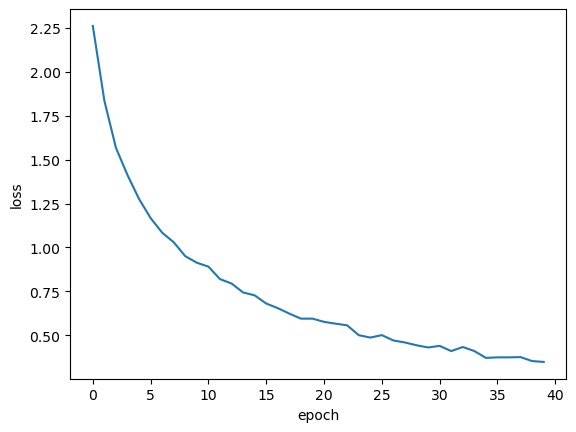

: 

In [14]:
X_train = np.load("X_train.npy") 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
y_train = np.load("y_train.npy")
print(np.sum(y_train, axis=0))

X_val = np.load("X_val.npy")
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))
y_val = np.load("y_val.npy")

print(np.sum(y_val, axis=0))

model = create_model(batch_normalization)
model = train_model(model, X_train, X_val, y_train, y_val, epochs)